# Phosphor Coating Thickness correlation with Lumen and CCT relationship anaylsis

## Introduction

In this report, we want to determine whether the new developed low profile WLED packaging method could maintain a 
better lumen performance compared with conventional WLED. In the experiment, the lumen performance of the low profile and conventional LED were characterized base on the changing of color temperature.


## Insights

In order to determine the influence of new packaging method, several consideration should be taken into concern, which will be very helpful for the data analysis.

## Approach and Methods

In this project, I use my experiment data of WLED samples with conventional packaging and new develped low profile packaging <br />
Below are my steps for making conclusion based on the data analysis of factors affecting the comparison result:
<br />
### 1.Data Preparation
·remove the irrelevant information<br />
·reformat the information and imputing missing values<br />
### 2.Data Modeling
·Using machine learning for further analysis<br />
·Applying Simple Linear Regression to predict the lumen performance trending <br />
### 3.Result and Conclusion
·Finding out whether there is an improvement on the low profile packaged WLED<br />

#### 1.Data Preparation

In [1]:
# Import linear algebra and data manipulation
import numpy as np
import pandas as pd

# Import plotting packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import machine learning model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Split the data into train, crossvalidation, test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#### Load Experiment data

In [2]:
# use pd.read_csv to read data
df_low_profile = pd.read_csv('conformal coating.csv')
df_conventional = pd.read_csv('conventional coating.csv')

In [3]:
# sort the data by CCT value
df_low_profile = df_low_profile.sort_values(by = 'CCT')
df_conventional = df_conventional.sort_values(by = 'CCT')

In [4]:
# Check the basic information in each dataset
df_low_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 38
Data columns (total 2 columns):
lumen    45 non-null float64
CCT      45 non-null int64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [5]:
df_low_profile

,lumen,CCT
0,238.582,4684
1,251.774,4710
2,250.187,4941
7,243.629,5037
5,244.106,5103
4,240.640,5181
6,238.182,5240
3,233.797,5454
8,240.117,5584
9,241.780,5789


In [6]:
df_conventional.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 15
Data columns (total 2 columns):
Lumen    18 non-null float64
CCT      18 non-null int64
dtypes: float64(1), int64(1)
memory usage: 432.0 bytes


In [7]:
df_conventional

,Lumen,CCT
0,245.894,4843
1,246.265,4914
2,238.820,5236
3,239.740,5714
4,236.950,5838
6,232.858,6373
5,187.621,6441
10,228.075,7031
7,193.811,7380
9,227.501,7753


Text(0, 0.5, 'Lumen Output, lm')

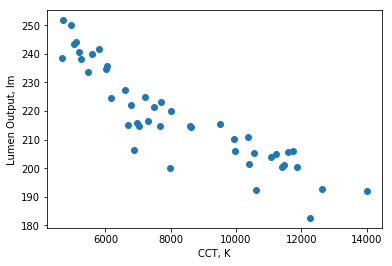

In [9]:
x_1= df_low_profile['CCT']
y_1= df_low_profile['lumen']
plt.scatter(x_1,y_1)
plt.xlabel('CCT, K')
plt.ylabel('Lumen Output, lm')

Text(0, 0.5, 'Lumen Output, lm')

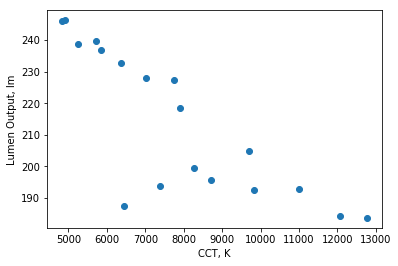

In [11]:
x_2= df_conventional['CCT']
y_2= df_conventional['Lumen']
plt.scatter(x_2,y_2)
plt.xlabel('CCT, K')
plt.ylabel('Lumen Output, lm')

In the both graph, there are several outliner which is far away from the rest of data. These outlier could be due to a processing mistake or the probability of extreme value.
<br/> For here, we look up the outliner in the dataset and delete it from dataset.

In [12]:
# look up all the data in the dataset
df_conventional

,Lumen,CCT
0,245.894,4843
1,246.265,4914
2,238.820,5236
3,239.740,5714
4,236.950,5838
6,232.858,6373
5,187.621,6441
10,228.075,7031
7,193.811,7380
9,227.501,7753


It is clear that point 5,7 are outlier, so we will delete these two datapoints.

In [13]:
df_conventional = df_conventional.drop([5,7],axis=0)

Text(0, 0.5, 'Lumen Output, lm')

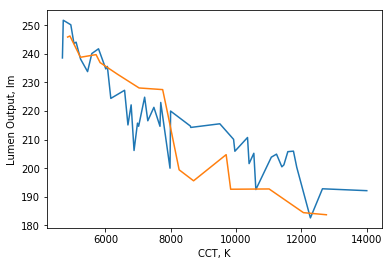

In [31]:
x_1= df_low_profile['CCT']
y_1= df_low_profile['lumen']
plt.plot(x_1,y_1)
plt.xlabel('CCT, K')
plt.ylabel('Lumen Output, lm')

x_2= df_conventional['CCT']
y_2= df_conventional['Lumen']
plt.plot(x_2,y_2)
plt.xlabel('CCT, K')
plt.ylabel('Lumen Output, lm')

### 2.Data Modeling

In [23]:
# Employing the simple linear regression for this model first
lm = LinearRegression()
X_1 = df_low_profile[['CCT']]
Y_1 = df_low_profile['lumen']
model1 = lm.fit(X_1,Y_1)

In [25]:
model1.coef_

array([-0.00595925])

In [26]:
model1.intercept_

267.0415839726314

In [27]:
X_2 = df_conventional[['CCT']]
Y_2 = df_conventional['Lumen']
model2 = lm.fit(X_2,Y_2)

In [28]:
model2.coef_

array([-0.00861704])

In [29]:
model2.intercept_

285.65608629525093

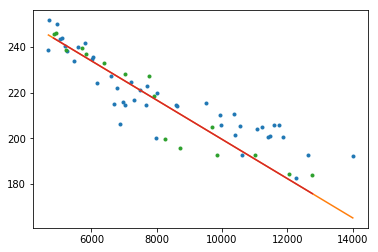

In [30]:
plt.plot(X_1,Y_1,'.',
        X_1,lm.predict(X_1),'-')
plt.plot(X_2,Y_2,'.',
        X_2,lm.predict(X_2),'-')

As we can see from the graph, there is not significant diffferent between these two method if we are using the simple linear regression. Therefore, we want to look further into polynomial regression

In [188]:
def polynomial_df(feature, degree):
    # assume that degree >= 1
    # initialize the dataframe:
    # your code
    poly_df = pd.DataFrame()
    # and set poly_df['power_1'] equal to the passed feature
    # your code
    poly_df['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        # your code
        for power in range (2,degree+1):
            # first we'll give the column a name:
            # your code
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            # your code
            poly_df[name] = feature ** power
    return poly_df

Plot several polynomial degree polynomial regression

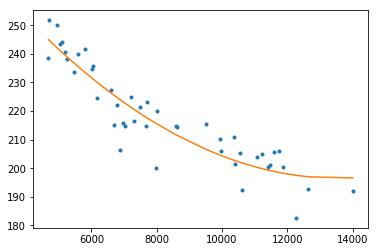

In [189]:
feature = df_low_profile['CCT']
input_features = polynomial_df(feature, 2)
lm.fit(input_features,Y_1)
plt.plot(input_features['power_1'],Y_1,'.',
        input_features['power_1'],lm.predict(input_features),'-')

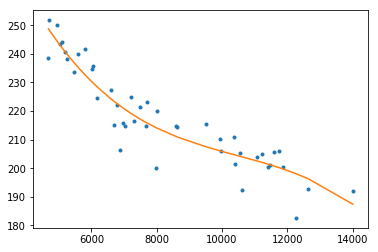

In [190]:
feature = df_low_profile['CCT']
input_features = polynomial_df(feature, 3)
lm.fit(input_features,Y_1)
plt.plot(input_features['power_1'],Y_1,'.',
        input_features['power_1'],lm.predict(input_features),'-')

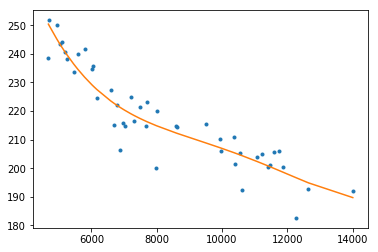

In [203]:
feature = df_low_profile['CCT']
input_features = polynomial_df(feature, 4)
model1 = lm.fit(input_features,Y_1)
plt.plot(input_features['power_1'],Y_1,'.',
        input_features['power_1'],model1.predict(input_features),'-')

We can find out that there is a overfitting when we pick 5 degree, so we pick 4

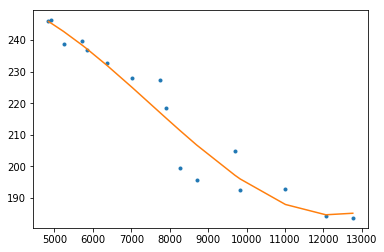

In [204]:
feature_1= df_conventional['CCT']
input_features_1 = polynomial_df(feature_1, 3)
model2 = lm.fit(input_features_1,Y_2)
plt.plot(input_features_1['power_1'],Y_2,'.',
        input_features_1['power_1'],model2.predict(input_features_1),'-')